22/11/2023 Terri Hoare




In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


In [3]:
gfclocks = pd.read_csv('GFCLOCKS.CSV')

In [4]:
type(gfclocks)

pandas.core.frame.DataFrame

In [5]:
gfclocks.shape

(32, 6)

In [6]:
# Print column names
gfclocks.columns.values

array(['AGE', 'NUMBIDS', 'PRICE', 'AGE-BID', 'AGESQ', 'NUMBIDSQ'],
      dtype=object)

In [7]:
# Print description of Boston housing data set
gfclocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   AGE       32 non-null     int64
 1   NUMBIDS   32 non-null     int64
 2   PRICE     32 non-null     int64
 3   AGE-BID   32 non-null     int64
 4   AGESQ     32 non-null     int64
 5   NUMBIDSQ  32 non-null     int64
dtypes: int64(6)
memory usage: 1.6 KB


Now let's explore the data set itself.

In [8]:
gfclocks.head()


,AGE,NUMBIDS,PRICE,AGE-BID,AGESQ,NUMBIDSQ
0,127,13,1235,1651,16129,169
1,115,12,1080,1380,13225,144
2,127,7,845,889,16129,49
3,150,9,1522,1350,22500,81
4,156,6,1047,936,24336,36


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns.

In [9]:
gfclocks.describe()

,AGE,NUMBIDS,PRICE,AGE-BID,AGESQ,NUMBIDSQ
count,32.000000,32.000000,32.000000,32.0000,32.000000,32.00000
mean,144.937500,9.531250,1326.875000,1362.3125,21733.937500,98.65625
std,27.395476,2.839632,393.486873,415.0722,8114.991674,57.84942
min,108.000000,5.000000,729.000000,648.0000,11664.000000,25.00000
25%,117.000000,7.000000,1053.000000,1005.2500,13689.000000,49.00000
50%,140.000000,9.000000,1257.500000,1365.0000,19609.000000,81.00000
75%,168.500000,11.250000,1560.750000,1621.0000,28393.000000,126.75000
max,194.000000,15.000000,2131.000000,2380.0000,37636.000000,225.00000


### Scatter plots
***

Let's look at some scatter plots for three variables: 'CRIM', 'RM' and 'PTRATIO'.

What kind of relationship do you see? e.g. positive, negative?  linear? non-linear?

Text(0.5, 1.0, 'Relationship between Age and Price')

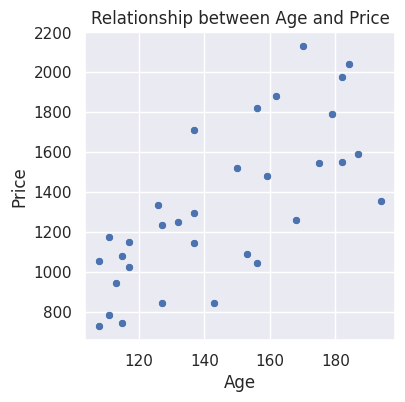

In [10]:
sns.set(rc={'figure.figsize':(4,4)})
sns.scatterplot(data=gfclocks, x="AGE", y="PRICE")
plt.xlabel("Age")
plt.ylabel("Price")
plt.title("Relationship between Age and Price")

Text(0.5, 1.0, 'Relationship between Number Bidders and Price')

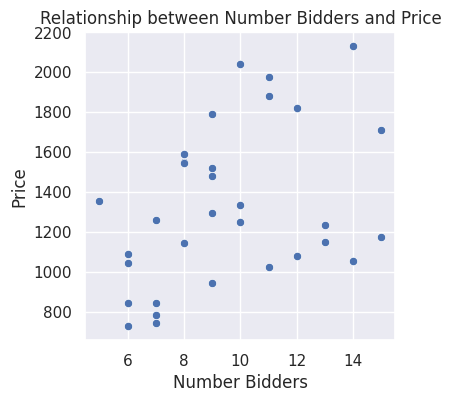

In [11]:
sns.set(rc={'figure.figsize':(4,4)})
sns.scatterplot(data=gfclocks, x="NUMBIDS", y="PRICE")
plt.xlabel("Number Bidders")
plt.ylabel("Price")
plt.title("Relationship between Number Bidders and Price")

### Histograms
***


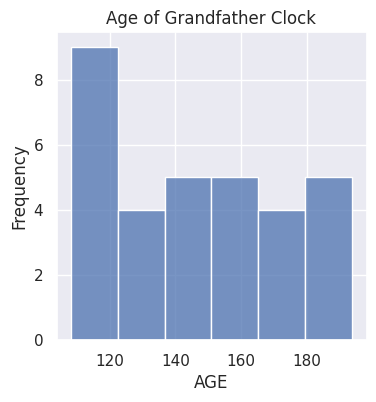

In [13]:
sns.histplot(gfclocks, x="AGE")
plt.title("Age of Grandfather Clock")
plt.xlabel("AGE")
plt.ylabel("Frequency")
plt.show()

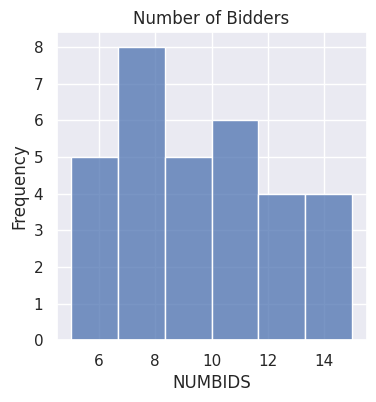

In [14]:
sns.histplot(gfclocks, x="NUMBIDS")
plt.title('Number of Bidders')
plt.xlabel('NUMBIDS')
plt.ylabel('Frequency')
plt.show()

## Multiple Linear regression with GFCLOCKS data example
***

Here,

$Y$ = PRICE (also called "target" data in python)

and

$X$ = AGE + NUMBIDS (or independent variables)

which we will use to fit a linear regression model and predict Grandfather Clock prices. We will use the least squares method as the way to estimate the coefficients.  

We'll use two ways of fitting a linear regression using statsmodels or sklearn. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***

In [16]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
from statsmodels.base.model import Model
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
model = ols('PRICE ~ AGE + NUMBIDS',gfclocks).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     120.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           9.22e-15
Time:                        15:43:17   Log-Likelihood:                -200.44
No. Observations:                  32   AIC:                             406.9
Df Residuals:                      29   BIC:                             411.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1338.9513    173.809     -7.704      0.000   -1694.432    -983.471
AGE           12.7406      0.905     14.082      0.000      10.890      14.591
NUMBIDS       85.9530      8.729      9.847      0.000      68.101     103.805
==============================================================================
Omnibus:                        6.658   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                2.027
Skew:                           0.036   Prob(JB):                        0.363
Kurtosis:                       1.769   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# residual standard error
np.sqrt(model.mse_resid)

133.4846678396104

In [18]:
model.fittedvalues

0     1396.490367
1     1157.650493
2      880.772460
3     1345.711633
4     1164.296125
5     1925.315973
6     1680.014031
7     1202.334284
8     1180.084170
9      874.310392
10    1695.802076
11    1097.178657
12    1094.131186
13    1126.074403
14    1269.084626
15    1125.890839
16    2030.288037
17    1667.457020
18    1670.504491
19    1864.844137
20     998.668662
21    1460.376800
22    1240.372443
23    1578.273001
24     552.748568
25    1715.188282
26    1364.547150
27    1731.159891
28     676.923275
29     727.885571
30    1562.484956
31    1403.135998
dtype: float64

In [42]:
residuals = gfclocks.PRICE - model.fittedvalues
residuals.describe()

count    3.200000e+01
mean    -6.252776e-13
std      1.291069e+02
min     -2.064850e+02
25%     -1.173363e+02
50%      1.665618e+01
75%      1.025532e+02
max      2.134955e+02
dtype: float64

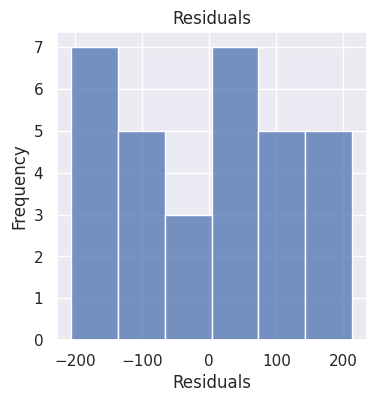

In [43]:
sns.histplot(residuals)
plt.title('Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [44]:
model.resid.describe()

count    3.200000e+01
mean    -6.252776e-13
std      1.291069e+02
min     -2.064850e+02
25%     -1.173363e+02
50%      1.665618e+01
75%      1.025532e+02
max      2.134955e+02
dtype: float64

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), bbut you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex, for a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


### Fitting Linear Regression using `sklearn`

In [23]:
from sklearn.linear_model import LinearRegression
X = gfclocks[["AGE","NUMBIDS"]]

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object?



In [24]:
# fit a model
lm.fit(X, gfclocks.PRICE)

LinearRegression()

In [25]:
# inspect the coefficients and intercept
print(lm.coef_, lm.intercept_)
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

[12.7405741  85.95298437] -1338.9513404758914


,features,estimatedCoefficients
0,AGE,12.740574
1,NUMBIDS,85.952984


In [26]:
#predict using the fitted model
# first five predicted prices
lm.predict(X)

array([1396.49036666, 1157.65049313,  880.77246045, 1345.71163342,
       1164.2961249 , 1925.31597327, 1680.01403111, 1202.33428404,
       1180.08417016,  874.31039183, 1695.80207637, 1097.17865695,
       1094.13118579, 1126.0744026 , 1269.08462569, 1125.89083946,
       2030.28803721, 1667.45702016, 1670.50449133, 1864.84413709,
        998.66866163, 1460.37680029, 1240.37244319, 1578.27300148,
        552.74856823, 1715.18828224, 1364.54714985, 1731.15989065,
        676.92327489,  727.88557128, 1562.48495622, 1403.13599843])

Text(0.5, 1.0, 'TIME_Y vs Predicted TIME_Y: $Y_i$ vs $\\hat{Y}_i$')

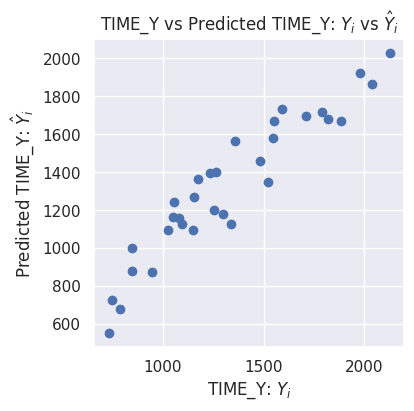

In [27]:
plt.scatter(gfclocks.PRICE, lm.predict(X))
plt.xlabel("TIME_Y: $Y_i$")
plt.ylabel("Predicted TIME_Y: $\hat{Y}_i$")
plt.title("TIME_Y vs Predicted TIME_Y: $Y_i$ vs $\hat{Y}_i$")